In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import qutip

In [3]:
import qutip as qt

In [4]:
import nvmodels
import numpy as np

In [5]:
nv = nvmodels.NVNegativeGroundState()

In [6]:
h_zfs = nv.zero_field_hamiltonian_ms0() # this is the simplified hamiltonian where m_s = 0 has eigenvalue = 0.
# and m_s = +-1 states have an eigenvalue of 2.87 GHz

In [7]:
h_zfs

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[2.87e+09 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00]
 [0.00e+00 2.87e+09 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00]
 [0.00e+00 0.00e+00 2.87e+09 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.87e+09 0.00e+00
  0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.87e+09
  0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  2.87e+09]]

In [8]:
# Print out the eigenvalues and eigenstates

vals, states = h_zfs.eigenstates()

for val, state in zip(vals, states):
    print(state)
    print(f'eigenvalue: {val}')
    print('electron state')
    print(state.ptrace(0))
    print('nuclear state')
    print(state.ptrace(1))
    match_state_e, _ = nvmodels.utilities.spin1dm2text(state.ptrace(0))
    match_state_n, _ = nvmodels.utilities.spin1dm2text(state.ptrace(1))
    print(f'|S_z = {match_state_e}, I_z = {match_state_n}>')
    print('')

Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
eigenvalue: 0.0
electron state
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
nuclear state
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
|S_z = 0, I_z = 1>

Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
eigenvalue: 0.0
electron state
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
nuclear state
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
|S_z = 0, I_z = 0>

Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
Qobj data =
[[0.]
 [0.]


Plot the eigenvalues for each of the eigenstates

In [11]:
# Use basis states to label states

state_probs = [nvmodels.utilities.two_qutrit_state_to_text(s) for s in states]

In [12]:
shifted_vals = vals - np.min(vals)
fig = nvmodels.plotting.plot_eigenspectrum(shifted_vals * 1.e-9, state_probs, ylabel='Energy (GHz)')
fig.show()

# State Time Evolution

Let's observe state evolution. First, let's start with an eigenstate. Eigenstates are, of course, stationary states
and should not change over time. (See the Visualizing Spin 1 on a Bloch Sphere notebook for a walk-through of these utility and plotting functions.)

In [13]:
vals, states = h_zfs.eigenstates()

In [14]:
# Let's use the first eigenstate returned, states[0]

#electron
states[0].ptrace(0)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]

In [15]:
#nitrogen
states[0].ptrace(1)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

In [16]:
nvmodels.utilities.two_qutrit_state_to_text(states[0])

'1.000|0,1>'

In [18]:
times = np.linspace(0,.55e-9,20) # 0.55 nanoseconds

In [19]:
result = qutip.sesolve(h_zfs, states[0], tlist=times)

In [20]:
# The eigenstate, as expected, does not change over time. 

s = result.states[0]
for ss in result.states:
    assert s == ss

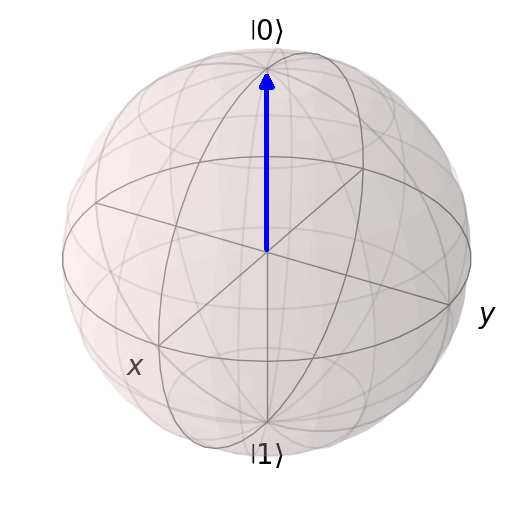

In [21]:
bloch = qutip.Bloch()
bloch.vector_color = ["b"] * len(result.states)
for i, s in enumerate(result.states):
    s = nvmodels.utilities.N_qutritdm_to_qubitket(s, 0, plus_zero = True)
    bloch.add_states([s], alpha=0.2 + 0.8 * (i / len(bloch.vector_color)))
bloch.show()

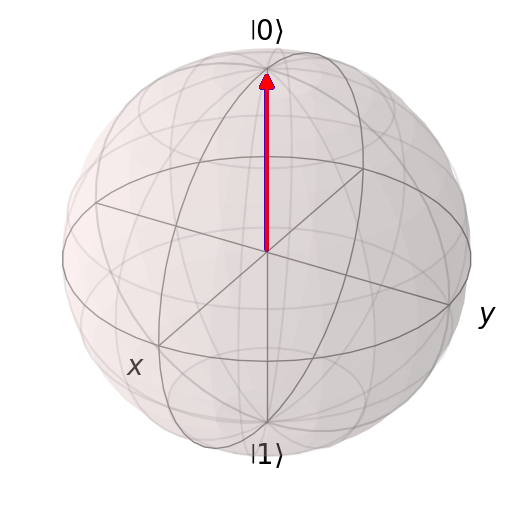

In [22]:
# There is a built-in function to plot a list of states
nvmodels.plotting.plot_states_on_Bloch(result.states, subsystem=0, plus_zero=True, start_color = "green",
                                      end_color = "red", color = "b")
# you can see that all of the states in results.states are equal since they all overlap

In [23]:
# Now let's create a state where the electron is in a superposition |m_s = 0> + |m_s = +1> 
# and the nitrogen is in the m_i = 0 state. 

In [24]:
psi_plus_0 = qutip.tensor( (qutip.basis(3,0) + qutip.basis(3,1)).unit(), qutip.basis(3,1))  # | +, 0>

In [25]:
result = qutip.sesolve(h_zfs, psi_plus_0, tlist=times)

In [26]:
# we now see the electron |+> state evolve over time.
bloch = nvmodels.plotting.plot_states_on_Bloch(result.states, subsystem=0, plus_zero=True)

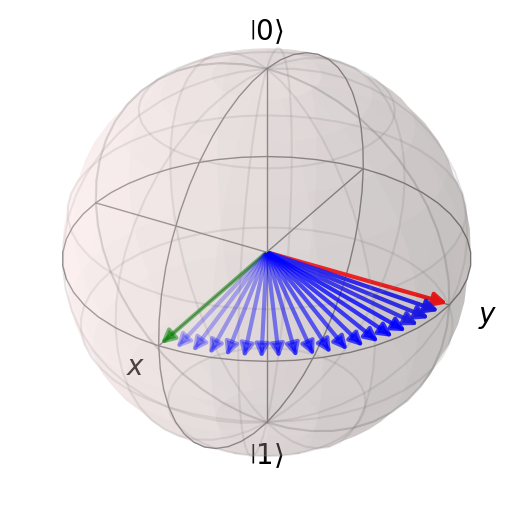

In [27]:
bloch.show()

In [28]:
# Now, let's use the rotate frame function to make the plus state stationary!

In [29]:
# by how much do we need to rotate

# The rotation above during a time of t = 0.55 ns by an angle ~pi/2, allows
# estimation of the rotation frequency needed to make it stationary
# f * 0.55 ns ~= pi/2
# f  ~= pi/(2*.55 ns) = 2.85 GHz ~= 2.87 GHz

# This is, as expected. We need to rotate our frame at -2.87e9 Hz. 


h_zfs_rot = h_zfs + nv.rotate_frame(-2.87e9)

In [30]:
h_zfs_rot

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[-2.87e+09  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  2.87e+09  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00 -2.87e+09  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  2.87e+09  0.00e+00
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  2.87e+09
   0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   5.74e+09  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  8.61e+09]]

In [31]:
result = qutip.sesolve(h_zfs_rot, psi_plus_0, tlist=times)

In [32]:
# The state in this rotated frame is now stationary

s = result.states[0]
for ss in result.states:
    assert s == ss

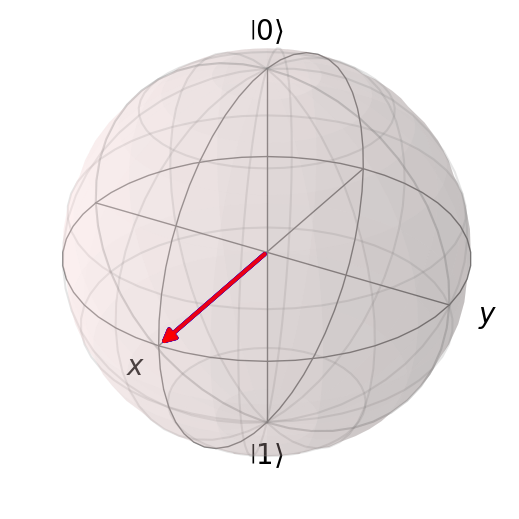

In [33]:
nvmodels.plotting.plot_states_on_Bloch(result.states[::2], subsystem=0, plus_zero=True)